In [1]:
# MAIN Module For Machine Learning 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

***********************Initial analysis and finding Relationships/Correlations :Start**************************************

Find any Significant Missing values that can impact any model 
 Survived      0
Pclass        0
Sex           0
Age         177
Parch         0
Fare          0
Cabin       687
dtype: int64 


Print the updated table after intial Data Analysis 
    Survived  Pclass     Sex   Age  Parch     Fare Cabin
0         0       3    male  22.0      0   7.2500   NaN
1         1       1  female  38.0      0  71.2833   C85
2         1       3  female  26.0      0   7.9250   NaN
3         1       1  female  35.0      0  53.1000  C123
4         0       3    male  35.0      0   8.0500   NaN 


*********************Initial analysis and finding Relationships/Correlations :END******************************************



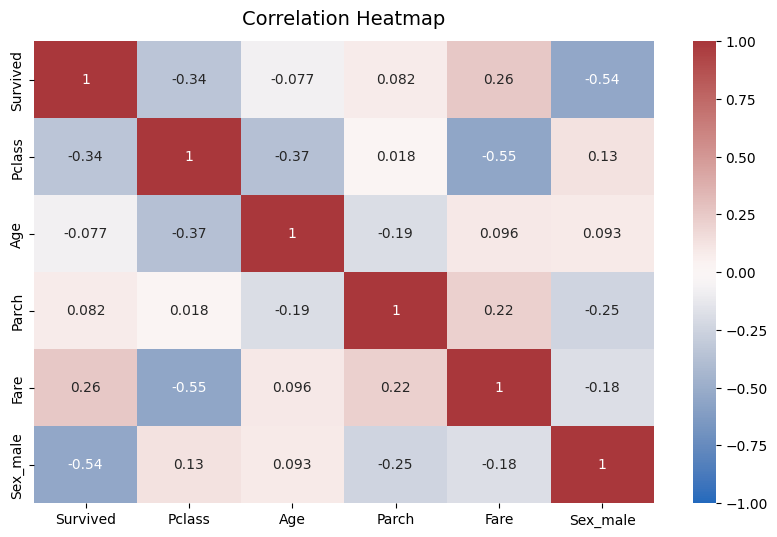

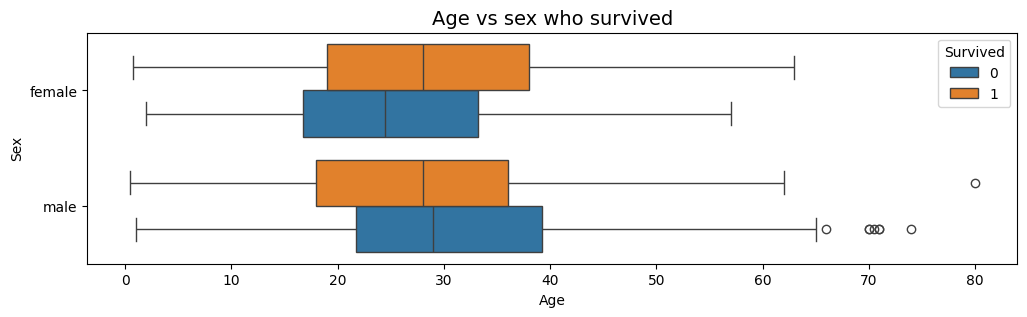

In [3]:
%run LogisticsRegression.ipynb
%run NaiveBayes.ipynb
%run DecisionTree.ipynb
%run RandomForest.ipynb
%run XGBoost.ipynb
%run MyLibrary.ipynb
%run Visualization.ipynb

### Load Data
pd.set_option('display.max_columns',None)
df_1 = pd.read_csv('data/train.csv')

print("***********************Initial analysis and finding Relationships/Correlations :Start**************************************\n")

#EDA_Generic: Drop ireelevant predictors which will not be use by any of the models
df = df_1.drop(["PassengerId","Name","Ticket","Embarked",'SibSp'],axis=1)
#find missing values that can have impact on all the models!
print("Find any Significant Missing values that can impact any model \n",df.isnull().sum(),"\n\n")
print("Print the updated table after intial Data Analysis \n",df.head(),"\n\n")

#Correlations
#Preprocessing for correlation heatmap
df_corr=df.drop(['Cabin'],axis=1)  #drop cabin as it has many missing values
# All predictors and targe should be numbers(int or float)
df_corr = pd.get_dummies(df_corr,drop_first=True)
# plot Correlations
CorrelationHeatMap(df_corr)

BoxPlotDistributionTwoVariablesAcrossTarget(df,'Age','Sex','Survived',"Age vs sex who survived")

print("*********************Initial analysis and finding Relationships/Correlations :END******************************************\n")

In [4]:
print("*************************Perform Exploratory Data Analysis :START**********************************************************\n")
# Missng values / Drop Columns / DummyEncodeCat variables / TypeCast 
df_LogReg_1  = EDA_LogisticsRegression(df)
print("Logistics Regression EDA output shape = ",df_LogReg_1.shape,"\n\n")
df_nb_1  = EDA_NaiveBayes(df)
print("Naive Bayes EDA output shape = ",df_nb_1.shape,"\n\n")
df_dt_1  = EDA_DecisionTree(df)
print("Decision Tree EDA output shape = ",df_dt_1.shape,"\n\n")
df_rf_1  = EDA_RandomForest(df)
print("Random Forest EDA output shape = ",df_rf_1.shape,"\n\n")
df_xgb_1 = EDA_XGBoost(df)
print("XGBoost EDA output shape       = ",df_xgb_1.shape,"\n\n")
print("*************************Perform Exploratory Data Analysis :ENDS***********************************************************\n")

*************************Perform Exploratory Data Analysis :START**********************************************************

Logistics RegressionEDA output shape = 
 Survived    0
Pclass      0
Sex         0
Age         0
Parch       0
Fare        0
dtype: int64
Logistics Regression: EDA - Complete 

Logistics Regression EDA output shape =  (714, 6) 


Naive Bayes EDA output shape = 
 Survived    0
Pclass      0
Sex         0
Age         0
Parch       0
Fare        0
dtype: int64
Naive Bayes : EDA - Complete 

Naive Bayes EDA output shape =  (714, 6) 


Decision Tree EDA output shape = 
 Survived    0
Pclass      0
Sex         0
Age         0
Parch       0
Fare        0
dtype: int64
Decision Tree : EDA - Complete 

Decision Tree EDA output shape =  (714, 6) 


Random Forest EDA output shape = 
 Survived    0
Pclass      0
Sex         0
Age         0
Parch       0
Fare        0
dtype: int64
Random Forest : EDA - Complete 

Random Forest EDA output shape =  (714, 6) 


XGBoost EDA output

In [5]:
print("**********************Perform Feature Engineering : START*****************************************")
#Perform Feature Extraciton/Transformation/Selection
df_LogReg  = FeatureEngineering_LogisticsRegression(df_LogReg_1)
df_nb      = FeatureEngineering_NaiveBayes(df_nb_1)
df_dt      = FeatureEngineering_DecisionTree(df_dt_1)
df_rf      = FeatureEngineering_RandomForest(df_rf_1)
df_xcb     = FeatureEngineering_XGBoost(df_xgb_1)
print("**********************Perform Feature Engineering : STOP*****************************************")

**********************Perform Feature Engineering : START*****************************************
Logistics Regression: Feature Engineering 

Selected predictors for transformation

Check if categorical variables are in string or dummy encoded 
 Index(['Survived', 'Age', 'Parch', 'Fare', 'Pclass_2', 'Pclass_3', 'Sex_male'], dtype='object') 

Selected predictors for modelling 

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Age       714 non-null    float64
 2   Parch     714 non-null    int64  
 3   Fare      714 non-null    float64
 4   Pclass_2  714 non-null    bool   
 5   Pclass_3  714 non-null    bool   
 6   Sex_male  714 non-null    bool   
dtypes: bool(3), float64(2), int64(2)
memory usage: 30.0 KB
None 

Naive Bayes : Feature Engineering 

Selected predictors for transformation

Check if categorical varia

In [6]:
X_LogReg_train,X_LogReg_test,y_LogReg_train,y_LogReg_test = Split_data(df_LogReg)
print("Lotistics Regression Training Data Size = ",X_LogReg_train.shape)
print("Logistics Regression Testing Data Size  = ",X_LogReg_test.shape)
X_nb_train,X_nb_test,y_nb_train,y_nb_test                 = Split_data(df_nb)
print("Naive Bayes Training Data Size          = ",X_nb_train.shape)
print("Naive Bayes Testing Data Size           = ",X_nb_test.shape)
X_dt_train,X_dt_test,y_dt_train,y_dt_test                 = Split_data(df_dt)
print("Random Forest Training Data Size        = ",X_dt_train.shape)
print("Random Forest Testing Data Size         = ",X_dt_test.shape)
X_rf_train,X_rf_test,y_rf_train,y_rf_test                 = Split_data(df_rf)
print("Random Forest Training Data Size        = ",X_rf_train.shape)
print("Random Forest Testing Data Size         = ",X_rf_test.shape)
X_xcb_train,X_xcb_test,y_xcb_train,y_xcb_test             = Split_data(df_xcb)
print("XGBoost Training Data Size              = ",X_xcb_train.shape)
print("XGBoost Testing Data Size               = ",X_xcb_test.shape)

Lotistics Regression Training Data Size =  (535, 6)
Logistics Regression Testing Data Size  =  (179, 6)
Naive Bayes Training Data Size          =  (535, 6)
Naive Bayes Testing Data Size           =  (179, 6)
Random Forest Training Data Size        =  (535, 6)
Random Forest Testing Data Size         =  (179, 6)
Random Forest Training Data Size        =  (535, 6)
Random Forest Testing Data Size         =  (179, 6)
XGBoost Training Data Size              =  (535, 6)
XGBoost Testing Data Size               =  (179, 6)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

LogReg_clf = LogisticRegression()
nb         = naive_bayes.GaussianNB()  # Choose one from : GaussianNB,BernoulliNB,CategoricalNB,ComplementNB,MultinomialNB 
dt_cv      = DecisionTreeClassifier(random_state=0)
rf_cv      = RandomForestClassifier(random_state=0)
xcb_cv     = XGBClassifier(random_state=0)


path = 'pickle_files/'
dt_cv =read_pickle(path,"titanic_dt_model")
rf_cv =read_pickle(path,"titanic_rf_model")
xcb_cv=read_pickle(path,"titanic_xcb_model")

#Performe Parameter Tuning
dt_cv  = HyperParameterTuning_DecisionTree()
rf_cv  = HyperParameterTuning_RandomForest()
xcb_cv = HyperParameterTuning_XGBoost()

X_rf_train.head()

Decision Tree : Hyperparameter Tuning 
Random Forest : Hyperparameter Tuning 
XGBoost       : Hyperparameter Tuning


,Age,Parch,Fare,Pclass_2,Pclass_3,Sex_male
675,18.0,0,7.775,False,True,True
465,38.0,0,7.050,False,True,True
754,48.0,2,65.000,True,False,False
160,44.0,1,16.100,False,True,True
350,23.0,0,9.225,False,True,True


In [8]:
%%time
import warnings
warnings.filterwarnings('ignore')

LogReg_clf.fit(X_LogReg_train, y_LogReg_train)

CPU times: total: 31.2 ms
Wall time: 11 ms


LogisticRegression()

In [9]:
%%time
import warnings
warnings.filterwarnings('ignore')

nb.fit(X_nb_train, y_nb_train)

CPU times: total: 0 ns
Wall time: 3 ms


GaussianNB()

In [10]:
%%time
import warnings
warnings.filterwarnings('ignore')
#dt_cv=read_pickle(path,"titanic_dt_model")
dt_cv.fit(X_dt_train, y_dt_train)
write_pickle(path,dt_cv,'titanic_dt_model')

CPU times: total: 62.5 ms
Wall time: 81 ms


In [11]:
%%time
import warnings
warnings.filterwarnings('ignore')
#rf_cv=read_pickle(path,"titanic_rf_model")
rf_cv.fit(X_rf_train, y_rf_train)
write_pickle(path,rf_cv,'titanic_rf_model')

CPU times: total: 93.8 ms
Wall time: 205 ms


In [12]:
%%time
import warnings
warnings.filterwarnings('ignore')
#xcb_cv=read_pickle(path,"titanic_xcb_model")
xcb_cv.fit(X_xcb_train, y_xcb_train)
write_pickle(path,xcb_cv,'titanic_xcb_model')

CPU times: total: 3min 56s
Wall time: 42.1 s


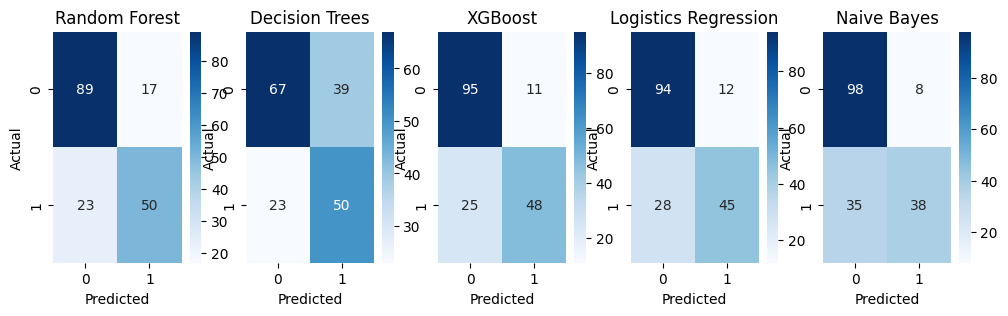

In [13]:
%run MyLibrary.ipynb
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score
#fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))  # Adjust figsize as needed
ModelNames=['Random Forest','Decision Trees', 'XGBoost','Logistics Regression','Naive Bayes']
clfs      =[rf_cv,dt_cv,xcb_cv,LogReg_clf,nb]


rf_test_result,cm0     =get_scores(ModelNames[0],clfs[0],X_rf_test,y_rf_test,True)
dt_test_result,cm1     =get_scores(ModelNames[1],clfs[1],X_dt_test,y_dt_test,True)
xgb_test_result,cm2    =get_scores(ModelNames[2],clfs[2],X_xcb_test,y_xcb_test,True)
LogReg_test_result,cm3 =get_scores(ModelNames[3],clfs[3],X_LogReg_test,y_LogReg_test,False)
nb_test_result,cm4     =get_scores(ModelNames[4],clfs[4],X_nb_test,y_nb_test,False)
#print(dt_cv.best_estimator_)
#print(rf_cv.best_estimator_)
#print(xcb_cv.best_estimator_)


PlotConfusionMatrix(cm0,cm1,cm2,cm3,cm4,ModelNames)

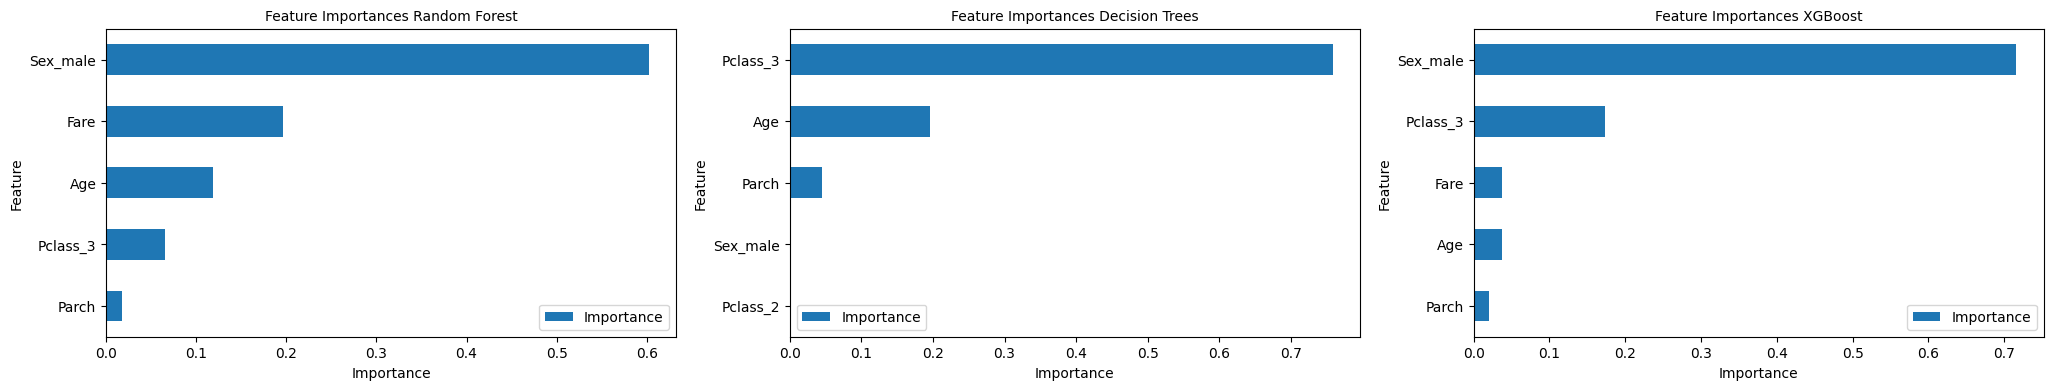

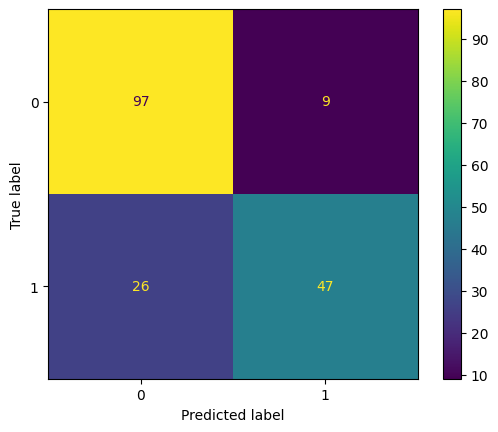

,model,precision,recall,f1,accuracy,AUC
0,Random Forest,0.746269,0.684932,0.714286,0.776536,0.762277
0,XGBoost,0.813559,0.657534,0.727273,0.798883,0.776880
0,Decision Trees,0.561798,0.684932,0.617284,0.653631,0.658503
0,Naive Bayes,0.826087,0.520548,0.638655,0.759777,0.722538
0,Logistics Regression,0.789474,0.616438,0.692308,0.776536,0.751615
0,HybridStackingModel,0.839286,0.643836,0.728682,0.804469,0.779465


In [14]:
%run MyLibrary.ipynb
%run Stacking.ipynb
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

stacking_model=Get_Stacking_Classifier()

X= df_rf.drop(['Survived'],axis=1)
X_train,X_test,y_train,y_test = Split_data(df_rf)

stacking_model.fit(X_train, y_train)

test_result=pd.DataFrame()
Stacking_test_result,cm=get_scores("HybridStackingModel",stacking_model,X_test,y_test,False)
test_result=pd.concat([rf_test_result,xgb_test_result,dt_test_result,nb_test_result,LogReg_test_result,Stacking_test_result])


clf = [rf_cv,dt_cv,xcb_cv]
GetFeatureImportance(clf,ModelNames,X,top_n_features=5)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=stacking_model.classes_)
disp.plot(values_format='') # `values_format=''` suppresses scientific notation
plt.show()

test_result

In [15]:
%run FinalTest.ipynb
PerformFinalTest()

Age         86
Parch        0
Fare         1
Pclass_2     0
Pclass_3     0
Sex_male     0
dtype: int64
impute missiong values by =  35.627188489208635
impute missiong values by =  30.272590361445783
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       418 non-null    float64
 1   Parch     418 non-null    int64  
 2   Fare      418 non-null    float64
 3   Pclass_2  418 non-null    bool   
 4   Pclass_3  418 non-null    bool   
 5   Sex_male  418 non-null    bool   
dtypes: bool(3), float64(2), int64(1)
memory usage: 11.1 KB


In [16]:

#plot_model_Tree(rf_cv,X_rf_train)
#plot_model_Tree_save_image(rf_cv)
#param_cv_xgb , scoring_xgb , cv_xgb , refit_xgb = HyperParameterTuning_XGBoost()